# Temperature Analysis I

### Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, for example, June and December?

In [1]:
#Dependencies
import pandas as pd
from datetime import datetime as dt
from scipy import stats

In [2]:
# "tobs" is "temperature observations"
df = pd.read_csv('../sqlalchemy-challenge/Resources/hawaii_measurements.csv')
df.head()

station        date  prcp  tobs
0  USC00519397  2010-01-01  0.08    65
1  USC00519397  2010-01-02  0.00    63
2  USC00519397  2010-01-03  0.00    74
3  USC00519397  2010-01-04  0.00    76
4  USC00519397  2010-01-06   NaN    73

In [3]:
# Convert the date column format from string to datetime
df["date"]=pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  19550 non-null  object        
 1   date     19550 non-null  datetime64[ns]
 2   prcp     18103 non-null  float64       
 3   tobs     19550 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 611.1+ KB


In [15]:
df.set_index(df["date"])

station       date  prcp  tobs  month
date                                                 
2010-01-01  USC00519397 2010-01-01  0.08    65      1
2010-01-02  USC00519397 2010-01-02  0.00    63      1
2010-01-03  USC00519397 2010-01-03  0.00    74      1
2010-01-04  USC00519397 2010-01-04  0.00    76      1
2010-01-06  USC00519397 2010-01-06   NaN    73      1
...                 ...        ...   ...   ...    ...
2017-08-19  USC00516128 2017-08-19  0.09    71      8
2017-08-20  USC00516128 2017-08-20   NaN    78      8
2017-08-21  USC00516128 2017-08-21  0.56    76      8
2017-08-22  USC00516128 2017-08-22  0.50    76      8
2017-08-23  USC00516128 2017-08-23  0.45    76      8

[19550 rows x 5 columns]

In [17]:
# New column with months
df['month']= df['date'].dt.month
df.head()

station       date  prcp  tobs  month
0  USC00519397 2010-01-01  0.08    65      1
1  USC00519397 2010-01-02  0.00    63      1
2  USC00519397 2010-01-03  0.00    74      1
3  USC00519397 2010-01-04  0.00    76      1
4  USC00519397 2010-01-06   NaN    73      1

In [23]:
 # Filter data for desired months
june_tobs=df.loc[df["month"]==6, ["tobs"]]
june_tobs.tobs.mean()


74.94411764705882

In [24]:
december_tobs=df.loc[df["month"]==12, ["tobs"]]
december_tobs.tobs.mean()

71.04152933421226

## You can enjoy Hawaii the whole year!!!

In [25]:
stats.ttest_ind(june_tobs.tobs, december_tobs.tobs, equal_var=False)

Ttest_indResult(statistic=31.355036920962423, pvalue=4.193529835915755e-187)

The t-test results confirmed that there is no meaningful difference in the average temperatures in June and December in Hawaii, given that we cannot reject the null hypothesis. You can enjoy Hawaii the whole year!!!

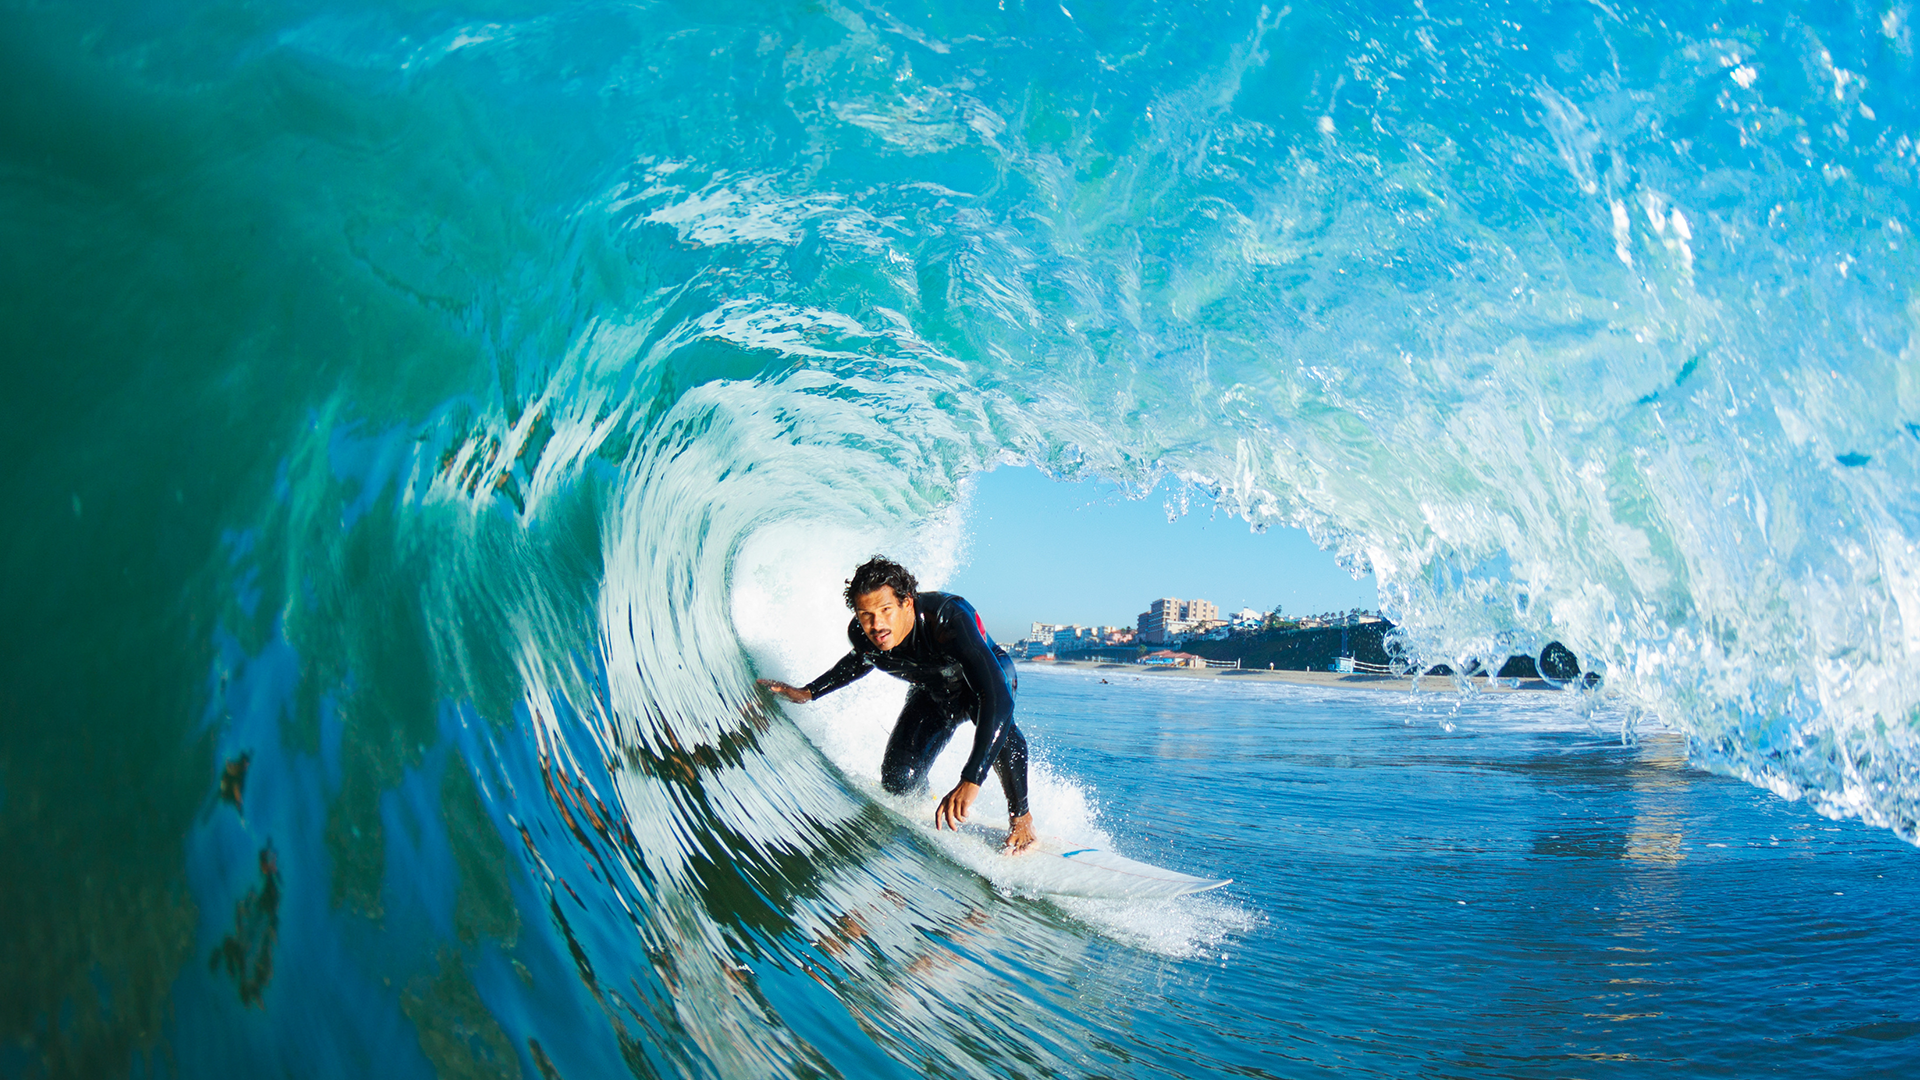
